# **The seventh in-class-exercise (40 points in total, 10/20/2021)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (15 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [1]:
# Write your code here

# Import required packages
import numpy as np
import pandas as pd
import csv

!pip install stop_words
# Define function for tokenize and lemmatizing
from stop_words import get_stop_words
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

# Gensim
import gensim
import gensim.corpora as corpora
from gensim import corpora, models
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
!pip install pyLDAvis==2.1.2
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt


  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32916 sha256=47c894d23715688e724c7007fd7d7178fb3b3ae94b068c72bacc02f8349f2c23
  Stored in directory: c:\users\ttp0037\appdata\local\pip\cache\wheels\eb\03\0d\3bd31c983789aeb0b4d5e2ca48590288d9db1586cf5f225062
Successfully built stop-words
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=b116d5937fb8737ba02b36f0f424ad85b2ae21c83729ee1326743fa399a61ea2
  Stored in directory: c:\users\ttp0037\appdata\local\pip\cache\wheels\31\8c\a0\24a443892f2134e691d59c8c6c35e19821e02f85e49871f8fd
Successfully built pyLDAvis


In [2]:
df = pd.read_csv('Avatar_reviews.csv')
df.head()

C:\Users\ttp0037\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,username,rating,review_title,review_text,review_date
0,0,sunwarrior13,10/10,More Impressive On Technical Level Than Storyt...,Avatar is an epic science fiction film written...,2 March 2012
1,1,Chrysanthepop,NaN,Pocahontas in A Moon,"After more than a decade, James Cameron makes ...",15 April 2010
2,2,filipemanuelneto,8/10,"Visually extraordinary, with excellent cinemat...",I confess that this film never really caught m...,4 December 2020
3,3,dfranzen70,5/10,"Incredible, inventive effects can't save this",James Cameron's long-awaited Titanic follow-up...,29 December 2009
4,4,Jonny_Numb,8/10,Cameron's Visual Dazzle Saves Familiar Story,"At this point, the smothering hype machine has...",13 January 2010


In [4]:
df['review_text'] = df['review_text'].apply(lambda x: " ".join(x for x in str(x).split() if not x.isdigit() and not x.isspace()))
df['review_text'] = df['review_text'].str.replace('[^\w\s]','')
df['review_text'] = df['review_text'].str.lower()
df

C:\Users\ttp0037\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:2: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
<ipython-input-4-89cabbdbada6>:2: DeprecationWarning: invalid escape sequence \w
  df['review_text'] = df['review_text'].str.replace('[^\w\s]','')
<ipython-input-4-89cabbdbada6>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review_text'] = df['review_text'].str.replace('[^\w\s]','')


,Unnamed: 0,username,rating,review_title,review_text,review_date
0,0,sunwarrior13,10/10,More Impressive On Technical Level Than Storyt...,avatar is an epic science fiction film written...,2 March 2012
1,1,Chrysanthepop,NaN,Pocahontas in A Moon,after more than a decade james cameron makes q...,15 April 2010
2,2,filipemanuelneto,8/10,"Visually extraordinary, with excellent cinemat...",i confess that this film never really caught m...,4 December 2020
3,3,dfranzen70,5/10,"Incredible, inventive effects can't save this",james camerons longawaited titanic followup is...,29 December 2009
4,4,Jonny_Numb,8/10,Cameron's Visual Dazzle Saves Familiar Story,at this point the smothering hype machine has ...,13 January 2010
...,...,...,...,...,...,...
96,96,drewfamilyman,10/10,Duh !!!,i had been wanting to see avatar since i heard...,20 December 2009
97,97,markneeleman000,3/10,I did NOT like this movie.,in this age of pulp its hardly surprising this...,30 December 2009
98,98,Gumnutblossom,6/10,"Amazing special effects, but was way too long.",when i saw this movie i was soso about what id...,26 December 2009
99,99,hsreviewonlinereviews,5/10,The Star Wars Of Our Generation,james camerons avatar was mindblowing and know...,17 January 2010


In [6]:
# tokenize words and Clean-up text
tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = get_stop_words('en')
stop_plus = ['avatar']

# create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

# create list of documents
review_set = [review for review in df['review_text']]

# list for tokenized documents in loop
texts = []

# loop through document list
for i in review_set:
    
    # clean and tokenize document string
    tokens = tokenizer.tokenize(i)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop + stop_plus]
    # add tokens to list
    texts.append(stopped_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

C:\Users\ttp0037\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
# view corpus
print(corpus[:1])

[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1), (30, 2), (31, 2), (32, 1), (33, 1), (34, 3), (35, 2), (36, 1), (37, 1), (38, 1), (39, 1), (40, 2), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 2), (48, 1), (49, 2), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 3), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 2), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 3), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 6), (97, 1), (98, 1), (99, 1), (100, 1), (101, 2), (102, 1), (103, 1), (104, 1), (105, 1), (106, 2), (107, 2), (108, 1), (109, 1), (110, 1)

C:\Users\ttp0037\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
# Human readable format of corpus (term-frequency)
[[(dictionary[id], freq) for id, freq in cp] for cp in corpus[:1]]

C:\Users\ttp0037\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[('3d', 2),
  ('able', 1),
  ('absorbing', 1),
  ('academy', 1),
  ('actors', 1),
  ('adjectives', 1),
  ('adopted', 1),
  ('alien', 1),
  ('allows', 1),
  ('alongside', 1),
  ('alpha', 1),
  ('already', 1),
  ('also', 1),
  ('ambitious', 1),
  ('arm', 2),
  ('atmosphere', 1),
  ('augustine', 1),
  ('avatars', 1),
  ('awaiting', 1),
  ('awardwinning', 1),
  ('battle', 1),
  ('battling', 1),
  ('becomes', 1),
  ('begins', 1),
  ('bestas', 1),
  ('biggest', 1),
  ('blueskinned', 1),
  ('bodies', 2),
  ('brings', 1),
  ('broken', 1),
  ('brother', 2),
  ('called', 2),
  ('camera', 1),
  ('cameras', 1),
  ('cameron', 3),
  ('camerons', 2),
  ('can', 1),
  ('captured', 1),
  ('centauri', 1),
  ('century', 1),
  ('chance', 2),
  ('classic', 1),
  ('code', 1),
  ('col', 1),
  ('collaboration', 1),
  ('colony', 1),
  ('comes', 1),
  ('company', 2),
  ('complex', 1),
  ('computergenerated', 2),
  ('confines', 1),
  ('connect', 1),
  ('connection', 1),
  ('conscience', 1),
  ('consciousnesses',

In [9]:
lda_model = gensim.models.ldamodel.LdaModel(corpus = corpus,
                                           num_topics = 20, 
                                           id2word = dictionary, 
                                           passes = 50, 
                                           random_state = 100, 
                                           update_every = 1, 
                                           chunksize = 100, 
                                           alpha = 'auto', 
                                           per_word_topics = True)

C:\Users\ttp0037\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
# view the topics in LDA model by using print_topics
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.006*"knowledge" + 0.006*"okay" + 0.006*"seem" + 0.006*"reason" + '
  '0.005*"hands" + 0.005*"power" + 0.005*"enables" + 0.004*"played" + '
  '0.003*"nonwhites" + 0.003*"terra"'),
 (1,
  '0.008*"space" + 0.007*"reviewers" + 0.005*"theater" + 0.005*"developed" + '
  '0.005*"equipment" + 0.005*"also" + 0.004*"animation" + 0.004*"sounds" + '
  '0.004*"pr" + 0.004*"travel"'),
 (2,
  '0.012*"james" + 0.010*"idea" + 0.006*"simply" + 0.006*"feature" + '
  '0.006*"shows" + 0.006*"especially" + 0.006*"interesting" + 0.005*"work" + '
  '0.005*"cameron" + 0.005*"realistic"'),
 (3,
  '0.008*"avatars" + 0.007*"sacred" + 0.006*"online" + 0.005*"humans" + '
  '0.005*"plug" + 0.005*"jim" + 0.005*"mother" + 0.005*"kept" + '
  '0.005*"complex" + 0.004*"cameroon"'),
 (4,
  '0.035*"story" + 0.025*"film" + 0.023*"visuals" + 0.019*"films" + '
  '0.018*"ive" + 0.018*"weak" + 0.015*"one" + 0.015*"seen" + 0.015*"movie" + '
  '0.015*"first"'),
 (5,
  '0.010*"director" + 0.008*"means" + 0.007*"know" + 0

C:\Users\ttp0037\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
# compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))

# compute Coherence score
coherence_model_lda = CoherenceModel(model = lda_model,
                                    texts = texts,
                                    dictionary = dictionary,
                                    coherence = 'c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence score: ', coherence_lda)

C:\Users\ttp0037\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -9.55625778080945
Coherence score:  0.4426292659052833


In [18]:
coherence = []
perplexity = []
for i in range(5,20):
    #print('Round: '+ str(i))
    lda_model = gensim.models.ldamodel.LdaModel(corpus = corpus,
                                                id2word = dictionary,
                                                num_topics = i, 
                                                chunksize = 10000,
                                                passes = 10,
                                                iterations = 200,
                                                eval_every = None) 

    coherence_model_lda = CoherenceModel(model = lda_model, 
                                         texts = texts, 
                                         dictionary = dictionary, 
                                         coherence = 'c_v') 

    coherence.append([i,coherence_model_lda.get_coherence()])
    doc_lda = lda_model[corpus]
    perplexity.append(lda_model.log_perplexity(corpus))

print(coherence)
print(perplexity)

C:\Users\ttp0037\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[5, 0.3283457092804366], [6, 0.3182929998412431], [7, 0.307193456568696], [8, 0.28304935960490973], [9, 0.31137326148888317], [10, 0.32013790229503736], [11, 0.3122921192311418], [12, 0.2998626754925557], [13, 0.29349115227365363], [14, 0.3002981520742198], [15, 0.3135357268449601], [16, 0.2829310006487691], [17, 0.2998411558194217], [18, 0.3151168523141213], [19, 0.3134873420763324]]
[-7.991416929598698, -8.036704366514998, -8.063245524107927, -8.070728690427966, -8.094665985952448, -8.119097890855627, -8.14702590495602, -8.161317686092453, -8.21178695680212, -8.20348753271072, -8.197185672070423, -8.2344217534795, -8.264879297620014, -8.265356305630595, -8.269537704592752]


In [19]:
column_names = ['num topics', 'Coherence']
coh_per_df = pd.DataFrame(coherence, columns = column_names)
coh_per_df['Perplexity'] = perplexity
coh_per_df

C:\Users\ttp0037\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,num topics,Coherence,Perplexity
0,5,0.328346,-7.991417
1,6,0.318293,-8.036704
2,7,0.307193,-8.063246
3,8,0.283049,-8.070729
4,9,0.311373,-8.094666
5,10,0.320138,-8.119098
6,11,0.312292,-8.147026
7,12,0.299863,-8.161318
8,13,0.293491,-8.211787
9,14,0.300298,-8.203488


C:\Users\ttp0037\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


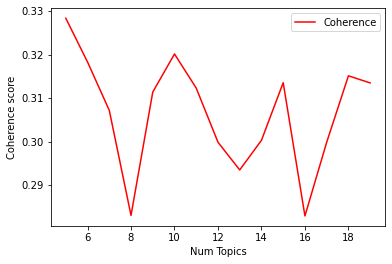

In [20]:
ax = plt.gca()

coh_per_df.plot(kind = 'line', x = 'num topics', y = 'Coherence', color = 'red', ax = ax)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.show()

In [ ]:
# we can choose k = 10 because with k = 10, the coherence score is highest
# summary:
'''
Topic 1: 'knowledge', 'okay', 'seem', 'reason', 'hands','power', 'enables', 
            'played', 'nonwhites',  'terra'

Topic 2: 'space', 'reviewers', 'theater', 'developed', 'equipment', 'also'
            'animation', 'sounds', 'pr', 'travel'

Topic 3: 'james', 'idea', 'simply', 'feature', 'shows', 'especially', 'interesting',
            'work', 'cameron', 'realistic'

Topic 4: 'avatars', 'sacred', 'online', 'humans', 'plug', 'jim', 'mother',
            'kept', 'complex', 'cameroon'

Topic 5: 'story', 'film', 'online', 'visuals', 'films', 'ive', 'weak',
            'one', 'seen', 'movie'
                        
Topic 6: 'director', 'means', 'know', 'work', 'best', 'happens', 'humans',
            'ones', 'award', 'manages'

Topic 7: 'american', 'sometimes', 'believe', 'whether', 'intelligent', 'somehow', 'elsewhere',
            'delivers', 'ideas', 'fairly'

Topic 8: 'white', 'maybe', 'evil', 'nothing', 'understand', 'expensive', 'actual',
            'sad', 'spent', 'instead'            
            
Topic 9: 'clan', 'company', 'surely', 'try', 'teach', 'daughter', 'link',
            'mine', 'falls', 'mineral'            
                        
Topic 10: 'film', 'navi', 'world', 'new', 'jake', 'planet', 'pandora', 
            'james', 'aliens', '3d'            
                                    
        
'''


## (2) (15 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [21]:
# Write your code here

# Write your code here
# building LSA model
lsamodel = gensim.models.lsimodel.LsiModel(corpus, num_topics = 10, id2word = dictionary)
for topic in lsamodel.print_topics(num_topics=10, num_words=8):
    print(topic)


C:\Users\ttp0037\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0, '0.385*"movie" + 0.331*"film" + 0.221*"story" + 0.191*"like" + 0.181*"just" + 0.177*"cameron" + 0.173*"one" + 0.139*"see"')
(1, '0.575*"movie" + -0.558*"film" + -0.154*"created" + -0.154*"cameron" + 0.118*"thats" + -0.115*"pandora" + 0.100*"good" + 0.086*"bad"')
(2, '-0.371*"navi" + -0.281*"jake" + 0.247*"film" + -0.184*"humans" + 0.174*"movie" + -0.122*"clan" + 0.115*"story" + -0.110*"teach"')
(3, '-0.265*"just" + 0.264*"movie" + -0.218*"like" + -0.182*"story" + 0.179*"cameron" + 0.160*"navi" + 0.139*"world" + -0.136*"pretty"')
(4, '-0.362*"just" + 0.342*"story" + 0.145*"instead" + 0.142*"another" + 0.131*"pretty" + -0.129*"least" + -0.120*"can" + -0.114*"cameron"')
(5, '-0.188*"can" + -0.182*"story" + 0.175*"character" + 0.147*"camerons" + -0.144*"one" + 0.143*"3d" + -0.141*"created" + -0.122*"humans"')
(6, '-0.187*"like" + -0.174*"pandora" + -0.174*"humans" + 0.155*"film" + -0.122*"james" + 0.119*"people" + 0.113*"another" + 0.107*"plot"')
(7, '-0.261*"really" + -0.138*"effects"

In [28]:
# determine the number of topics

start = 1
stop = 30
step = 1
coherence_value = []
topic_list = []

for topic_no in range(start, stop, step):
    topic = gensim.models.lsimodel.LsiModel(corpus, num_topics = topic_no, id2word = dictionary)
    #topic_list.append(topic)

    coherence_model_lsa = CoherenceModel(model=topic, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_lsa = coherence_model_lsa.get_coherence()
    coherence_value.append(coherence_lsa)

print(coherence_value)

for topic in lsamodel.print_topics(num_topics=10, num_words=8):
    topic_list.append(topic)
print(topic_list)

C:\Users\ttp0037\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[0.28395410904463114, 0.36831804345401453, 0.3274181161631286, 0.37330628956074885, 0.3661062001709044, 0.3349932075595585, 0.3181461572636724, 0.346415748922562, 0.3307119836580481, 0.32816507445622517, 0.34800734081730733, 0.3223646737737905, 0.3331971954405279, 0.31163181097842274, 0.3245467222713476, 0.3118234518567149, 0.3195544881462191, 0.3178008046662282, 0.3152331376694275, 0.3236482921155002, 0.3128446321569192, 0.3105123823008358, 0.3113904428294027, 0.3136178682949611, 0.3050879293711067, 0.3038510108804862, 0.3010590480583264, 0.3022229503181357, 0.29602075794930977]
[(0, '0.385*"movie" + 0.331*"film" + 0.221*"story" + 0.191*"like" + 0.181*"just" + 0.177*"cameron" + 0.173*"one" + 0.139*"see"'), (1, '0.575*"movie" + -0.558*"film" + -0.154*"created" + -0.154*"cameron" + 0.118*"thats" + -0.115*"pandora" + 0.100*"good" + 0.086*"bad"'), (2, '-0.371*"navi" + -0.281*"jake" + 0.247*"film" + -0.184*"humans" + 0.174*"movie" + -0.122*"clan" + 0.115*"story" + -0.110*"teach"'), (3, '-0

C:\Users\ttp0037\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


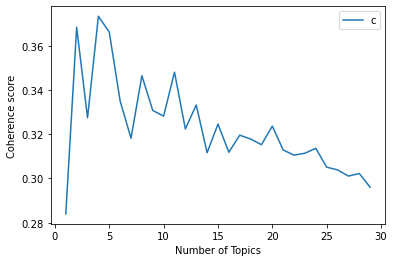

In [29]:
x = range(start, stop, step)
plt.plot(x, coherence_value)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [27]:
# Print the coherence scores
for m, cv in zip(x, coherence_value):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 3  has Coherence Value of 0.3613
Num Topics = 4  has Coherence Value of 0.3987
Num Topics = 5  has Coherence Value of 0.3661
Num Topics = 6  has Coherence Value of 0.3519
Num Topics = 7  has Coherence Value of 0.3294
Num Topics = 8  has Coherence Value of 0.3464
Num Topics = 9  has Coherence Value of 0.3336
Num Topics = 10  has Coherence Value of 0.343
Num Topics = 11  has Coherence Value of 0.3388
Num Topics = 12  has Coherence Value of 0.3294
Num Topics = 13  has Coherence Value of 0.3327
Num Topics = 14  has Coherence Value of 0.3272
Num Topics = 15  has Coherence Value of 0.3245
Num Topics = 16  has Coherence Value of 0.32
Num Topics = 17  has Coherence Value of 0.3074
Num Topics = 18  has Coherence Value of 0.3257
Num Topics = 19  has Coherence Value of 0.314
Num Topics = 20  has Coherence Value of 0.3165
Num Topics = 21  has Coherence Value of 0.3196
Num Topics = 22  has Coherence Value of 0.3151
Num Topics = 23  has Coherence Value of 0.3158
Num Topics = 24  has Coh

C:\Users\ttp0037\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# # we can choose k = 4 because with k = 4, the coherence score is highest
# summary:
'''
Topic 1: 'movie', 'film', 'story', 'like', 'just','cameron', 'one', 'see'

Topic 2: 'movie', 'film', 'created', 'cameron', 'thats', 'pandora', 'good', 'bad'

Topic 3: 'navi', 'jake', 'film', 'humans', 'movie', 'clan', 'story', 'teach'

Topic 4: 'just', 'movie', 'like', 'story', 'cameron', 'navi', 'world', 'pretty'


## (3) (10 points) Compare the results generated by the two topic modeling algorithms, which one is better? You should explain the reasons in details.

In [ ]:
# Write your answer here (no code needed for this question)
'''
After builing 2 models, I think LSA is better because of quick and efficient to use. 
LSA algorithm is a simple method and it gives a direct output. After I built LSA model using Gensim, I immediately generate a model and get a result with different values of number of topics. I only need a few steps to optimize the result (optimum number of topics). 
To find the ptimal number of topics in LDA, I have to use Mallet's version of LDA algorithm to build many lDA models with different value of number of topics and pick the highest coherence value.
However, it's easily to visualize LDA with pyLDAVis tool which you can visualize the distance between each topic (left part of the image) and by selecting a particular topic you can see the distribution of words in the horizontal bar graph (right part of the image).

'''
